## Libraries

In [1]:
import chatbot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
index, metadata = chatbot.load_single_index(chatbot.vector_dir)
print("Index and metadata loaded.")

Index and metadata loaded.


In [3]:
eval_dataset = [
  {
    "question": "O que é o Programa Temático Demografia, Qualificações e Inclusão no âmbito do PT2030?",
    "answer": "O Programa Temático Demografia, Qualificações e Inclusão do PT2030 tem como objetivo promover a inclusão social, melhorar as qualificações da população e responder aos desafios demográficos em Portugal. O programa apoia iniciativas nas áreas do emprego, educação, formação profissional, inclusão social e combate às desigualdades."
  },
  {
    "question": "Quais são os principais objetivos do Programa Temático Inovação e Transição Digital?",
    "answer": "O Programa Temático Inovação e Transição Digital visa reforçar a competitividade da economia portuguesa através do apoio à inovação, investigação e desenvolvimento, digitalização das empresas, adoção de tecnologias avançadas e capacitação digital dos trabalhadores."
  },
  {
    "question": "Que áreas são apoiadas pelo Programa Temático para a Ação Climática e Sustentabilidade?",
    "answer": "Este programa apoia investimentos relacionados com a transição climática, eficiência energética, energias renováveis, adaptação às alterações climáticas, proteção do ambiente e uso sustentável dos recursos naturais, contribuindo para uma economia mais verde e resiliente."
  },
  {
    "question": "O que é o MAR2030 no contexto do PT2030?",
    "answer": "O MAR2030 é o programa que operacionaliza o Fundo Europeu dos Assuntos Marítimos, das Pescas e Aquicultura em Portugal. Tem como objetivo promover a sustentabilidade ambiental, económica e social dos setores das pescas e da aquicultura, bem como o desenvolvimento das comunidades costeiras."
  },
  {
    "question": "Qual é o objetivo do Programa Regional do Norte 2021-2027?",
    "answer": "O Programa Regional do Norte 2021-2027 visa promover o desenvolvimento económico, social e territorial da região Norte, apoiando a inovação, a competitividade das empresas, a transição climática, a inclusão social e a coesão territorial."
  },
  {
    "question": "Que prioridades orientam o Programa Regional do Centro 2021-2027?",
    "answer": "O Programa Regional do Centro 2021-2027 apoia o crescimento sustentável da região Centro, com foco na inovação, valorização do território, transição energética, melhoria das qualificações e reforço da coesão social."
  },
  {
    "question": "Quais são os principais eixos do Programa Regional de Lisboa 2021-2027?",
    "answer": "O Programa Regional de Lisboa 2021-2027 centra-se na inovação, transição digital, sustentabilidade ambiental e inclusão social, procurando responder aos desafios específicos de uma região urbana e metropolitana."
  },
  {
    "question": "O que distingue o Programa Regional do Alentejo 2021-2027?",
    "answer": "O Programa Regional do Alentejo 2021-2027 aposta na valorização dos recursos endógenos, na sustentabilidade ambiental, no apoio às PME, na inovação e no reforço da coesão territorial numa região de baixa densidade populacional."
  },
  {
    "question": "Quais são os objetivos do Programa Regional do Algarve 2021-2027?",
    "answer": "O Programa Regional do Algarve 2021-2027 visa diversificar a economia regional, reduzir a sazonalidade, promover a sustentabilidade ambiental, apoiar a inovação e reforçar a resiliência do território."
  },
  {
    "question": "Qual é o papel do Programa Regional dos Açores 2021-2027?",
    "answer": "O Programa Regional dos Açores 2021-2027 apoia o desenvolvimento sustentável da região autónoma, promovendo a inovação, a adaptação às alterações climáticas, a mobilidade, a inclusão social e a valorização dos recursos naturais."
  },
  {
    "question": "Que objetivos tem o Programa Regional da Madeira 2021-2027?",
    "answer": "O Programa Regional da Madeira 2021-2027 tem como objetivo reforçar a competitividade regional, apoiar a transição digital e climática, melhorar a qualidade de vida da população e promover a coesão social e territorial."
  },
  {
    "question": "Para que serve o Programa de Assistência Técnica no PT2030?",
    "answer": "O Programa de Assistência Técnica apoia a gestão, monitorização, avaliação, comunicação e controlo dos programas do PT2030, garantindo a sua implementação eficaz e transparente."
  }
]

## RAGAS

In [12]:
def to_1d(vec):
    vec = np.array(vec)
    return vec.reshape(-1)

def cosine_sim(a, b):
    a = to_1d(a)
    b = to_1d(b)
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))


def precision_recall_at_k(gold_answer, retrieved_chunks, threshold=0.75):
    gold_emb = chatbot.embed_query(gold_answer)

    relevant = 0
    for chunk in retrieved_chunks:
        chunk_emb = chatbot.embed_query(chunk["text"])
        if cosine_sim(gold_emb, chunk_emb) >= threshold:
            relevant += 1

    precision = relevant / len(retrieved_chunks) if retrieved_chunks else 0
    recall = 1.0 if relevant > 0 else 0.0

    return precision, recall


def answer_similarity(gold_answer, llm_answer):
    gold_emb = chatbot.embed_query(gold_answer)
    llm_emb = chatbot.embed_query(llm_answer)

    return cosine_sim(gold_emb, llm_emb)

def groundedness_score(llm_answer, retrieved_chunks):
    llm_emb = chatbot.embed_query(llm_answer)

    scores = []
    for chunk in retrieved_chunks:
        chunk_emb = chatbot.embed_query(chunk["text"])
        scores.append(cosine_sim(llm_emb, chunk_emb))

    return max(scores) if scores else 0



In [13]:
results = []

for item in eval_dataset:
    query = item["question"]
    gold_answer = item["answer"]
    
    final_answer, context_chunks, distances = chatbot.answer(query, index, metadata, k=5)
    
    results.append({
        "query": query,
        "gold": gold_answer,
        "llm_answer": final_answer,
        "retrieved_chunks": context_chunks,
        "distances": distances
    })


O Programa Temático Demografia, Qualificações e Inclusão no âmbito do PT2030 visa promover a inclusão social e a melhoria das qualificações da população, especialmente dos grupos mais vulneráveis. Este programa foca na formação e capacitação de jovens em risco de abandono escolar, adultos com baixos níveis de qualificação, e outros grupos desfavorecidos, como pessoas ciganas e migrantes. 

O objetivo é facilitar a inserção no mercado de trabalho e combater a pobreza e a exclusão social, através de ações que promovam a igualdade de oportunidades e a não discriminação. O programa também se alinha com os desafios da transição verde e a modernização dos sistemas de proteção social, assegurando o acesso a serviços de qualidade e sustentáveis.

Além disso, o programa contempla a capacitação de profissionais que atuam com grupos vulneráveis, reforçando a importância da formação contínua e da inclusão ativa na sociedade. 

Referência: Documento sobre o PT2030.
Os principais objetivos do Progra

In [14]:
evaluated_results = []

for item in results:
    precision, recall = precision_recall_at_k(
        item["gold"],
        item["retrieved_chunks"]
    )

    ans_sim = answer_similarity(
        item["gold"],
        item["llm_answer"]
    )

    groundedness = groundedness_score(
        item["llm_answer"],
        item["retrieved_chunks"]
    )

    evaluated_results.append({
        "query": item["query"],
        "precision@k": precision,
        "recall@k": recall,
        "answer_similarity": ans_sim,
        "groundedness": groundedness
    })


In [15]:
df = pd.DataFrame(evaluated_results)

In [22]:
df

,query,precision@k,recall@k,answer_similarity,groundedness
0,"O que é o Programa Temático Demografia, Qualif...",0.0,0.0,0.885189,0.757725
1,Quais são os principais objetivos do Programa ...,0.0,0.0,0.781970,0.802410
2,Que áreas são apoiadas pelo Programa Temático ...,0.0,0.0,0.682737,0.768377
3,O que é o MAR2030 no contexto do PT2030?,0.2,1.0,0.811608,0.851141
4,Qual é o objetivo do Programa Regional do Nort...,0.2,1.0,0.879641,0.794620
5,Que prioridades orientam o Programa Regional d...,0.0,0.0,0.845848,0.762929
6,Quais são os principais eixos do Programa Regi...,0.4,1.0,0.834500,0.840110
7,O que distingue o Programa Regional do Alentej...,0.2,1.0,0.828065,0.805238
8,Quais são os objetivos do Programa Regional do...,0.6,1.0,0.850937,0.899004
9,Qual é o papel do Programa Regional dos Açores...,0.0,0.0,0.864325,0.754756


In [16]:
df.describe()

,precision@k,recall@k,answer_similarity,groundedness
count,12.000000,12.000000,12.000000,12.000000
mean,0.133333,0.416667,0.830304,0.796401
std,0.196946,0.514929,0.055517,0.046071
min,0.000000,0.000000,0.682737,0.754756
25%,0.000000,0.000000,0.819999,0.761628
50%,0.000000,0.000000,0.840174,0.781499
75%,0.200000,1.000000,0.867252,0.813956
max,0.600000,1.000000,0.885189,0.899004


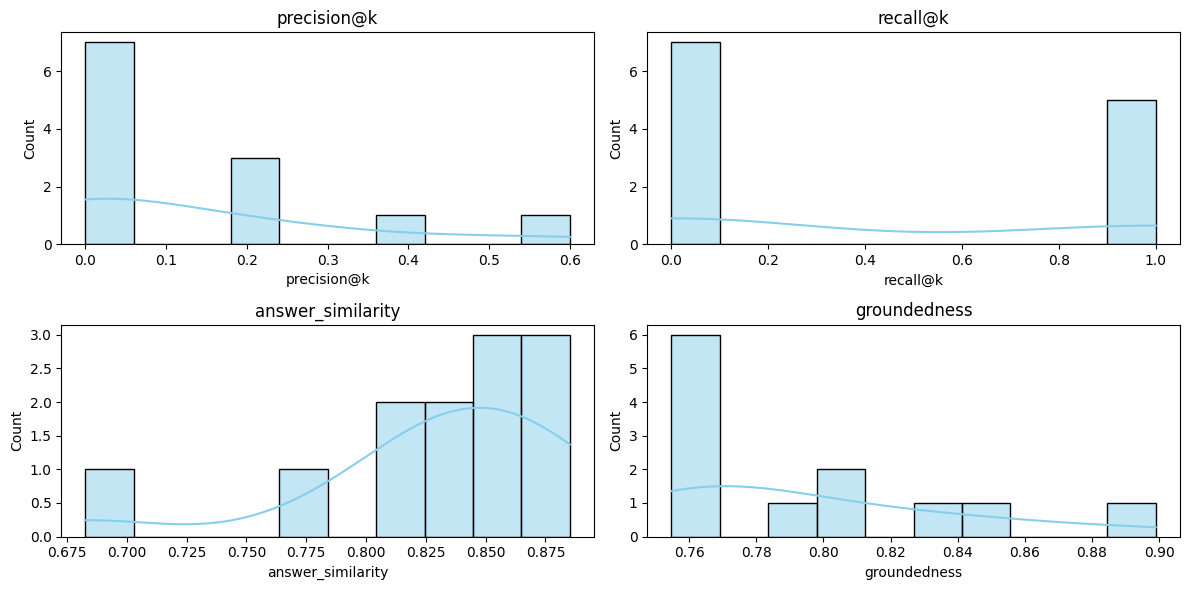

In [21]:
metrics = ["precision@k", "recall@k", "answer_similarity", "groundedness"]

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[metric], bins=10, kde=True, color="skyblue")
    plt.title(metric)
    plt.xlabel(metric)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Bot-Based

You can explicitly say:

Increasing k:

↑ Recall

↓ Precision

↑ Groundedness (usually)

Better chunking:

↑ Precision

↑ Groundedness

Larger chunks:

↑ Recall

↓ Precision

These trade-offs show deep understanding.